In [11]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df.shape

(1000, 8)

In [14]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Observation : No Missing Values

In [15]:
df.duplicated().sum()

0

#### Observation : No Duplicate Values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [17]:
# Checking the number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [18]:
# Check the stats of the data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Observation: 
   1. Means of all the columns are close to each other
   2. Standard deviation is also close 14.6 - 15.19
   3. Minimum for maths is 0 , while for others its 17 and 10

### Separating the numerical and categorical features

In [19]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features

['math_score', 'reading_score', 'writing_score']

In [20]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

Creating total score and average score columns

In [21]:
df['total_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'] )
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


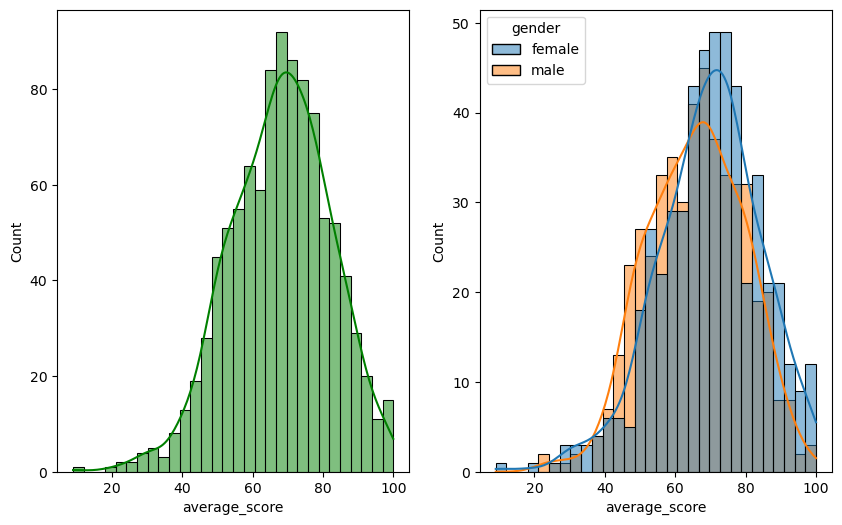

In [22]:
fig,axis = plt.subplots(1,2,figsize = (10,6))

plt.subplot(121)
sns.histplot(data = df, x = 'average_score', bins = 30 , kde = True, color = 'g')

plt.subplot(122)
sns.histplot(data = df, x = 'average_score', bins = 30, kde = True, hue= 'gender')

plt.show()

### Conclusion: Female students performed better than male students

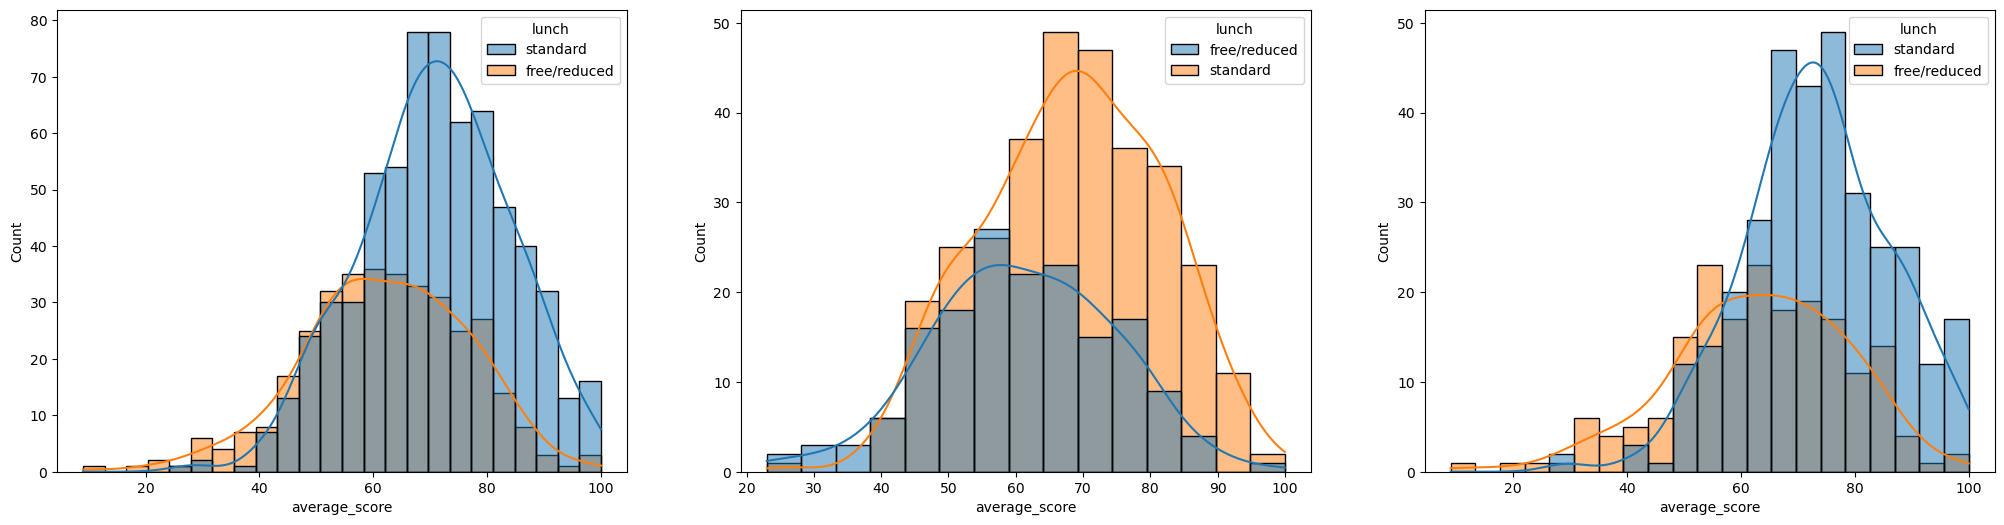

In [26]:
fig,axis = plt.subplots(1,3,figsize = (25,6))

plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'lunch')

plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'], x = 'average_score',  kde = True, hue= 'lunch')

plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'], x = 'average_score', kde = True, hue = 'lunch')

plt.show()

Conclusion: Standard lunch helps students (both male and female) perform well in exams.

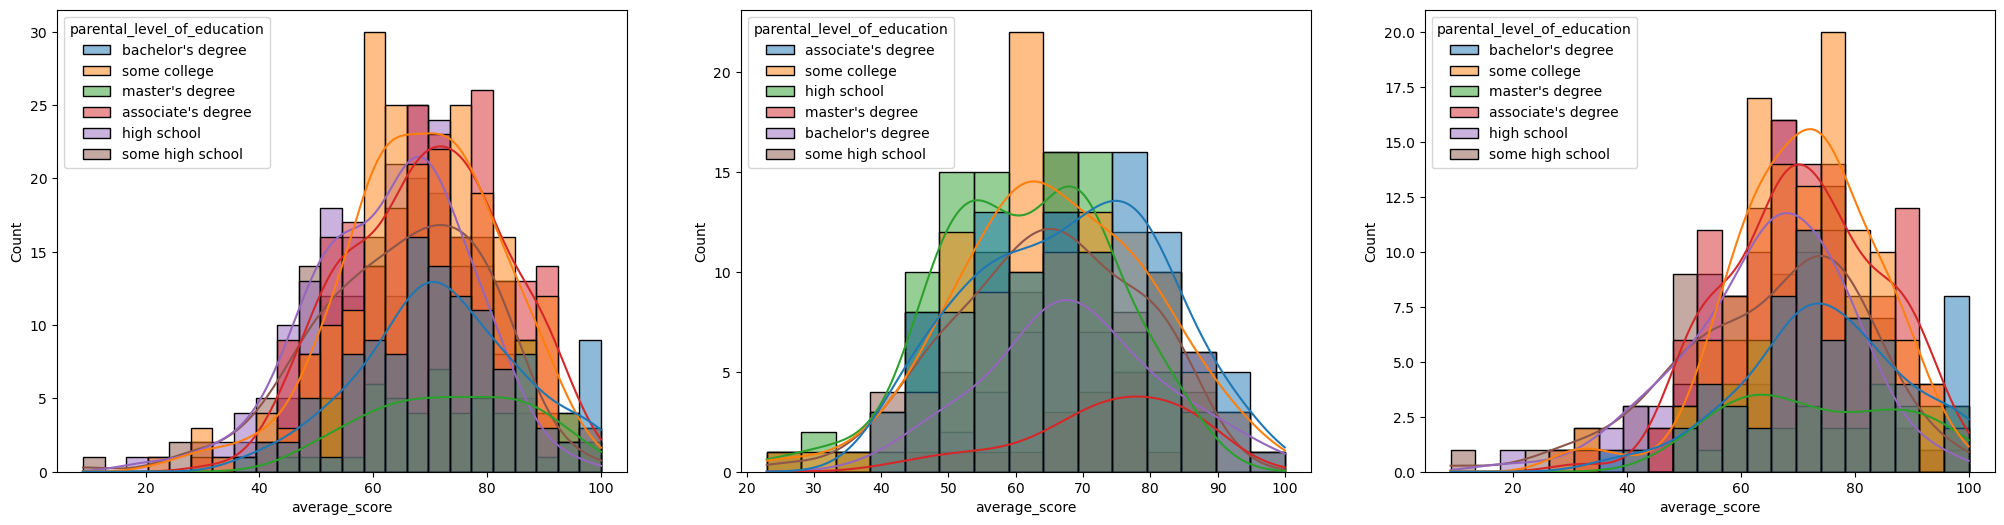

In [25]:
fig,axis = plt.subplots(1,3,figsize = (25,6))

plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'parental_level_of_education')

plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'], x = 'average_score',  kde = True, hue= 'parental_level_of_education')

plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'], x = 'average_score', kde = True, hue = 'parental_level_of_education')

plt.show()

### Conclusion: 
1. Parent's education does not significantly impact the students marks
2. Male child of parents having masters or associate degree tend to perform well
3. Female student's marks are not impacted by parent's level of education

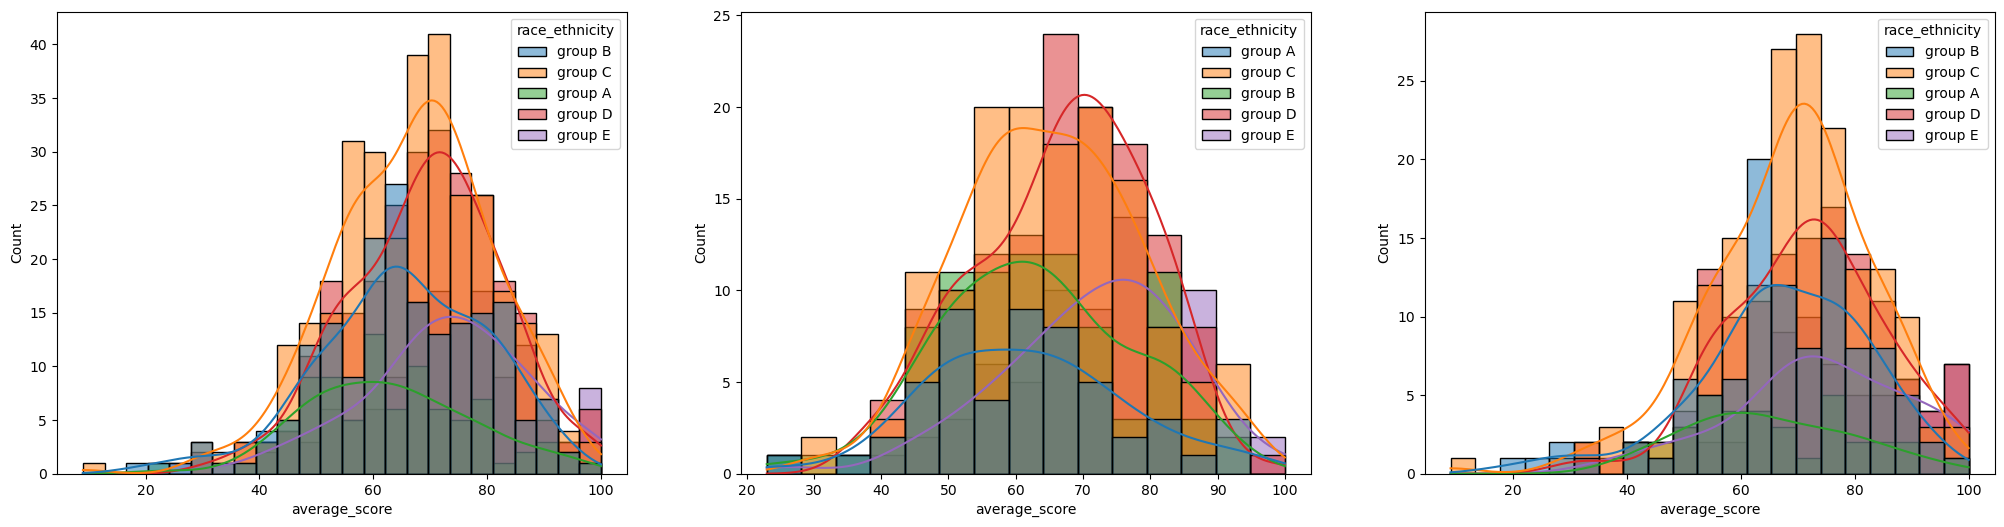

In [30]:
fig,axis = plt.subplots(1,3,figsize = (25,6))

plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'race_ethnicity')

plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'], x = 'average_score',  kde = True, hue= 'race_ethnicity')

plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'], x = 'average_score', kde = True, hue = 'race_ethnicity')
plt.show()

### Conclusion:
 Group A and B tend to perform poorly in exam irrespective of gender

In [ ]:
sns.pairplot(df, palette = 'hls')

<AxesSubplot: >

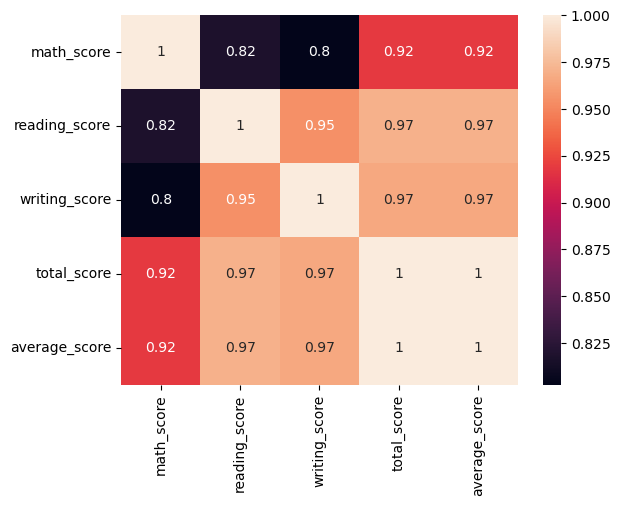

In [33]:
sns.heatmap(df.corr(), annot = True)